**Coronavirus disease 2019(COVID-19) is an infectious spreading disease,which is casued by severe acute respiratory syndrome coronavirus 2(SARS-Cov-2).This disease was first found in 2019 in Wuhan distirct of China, and is spreading tremendously across the globe,resulted in pandemic declaration by World Health Organization. This diesease has hit the world population wth almost 20 million people around the world sufferening from corona virus all over the Globe**

## Symtoms of Corona Virus:-

**Generally People are sick from Day 1 to Day 14 before develpoing symptoms.Common symtoms for corona virus is:-
**
* Fever
* 1Dry Cough
* Tiredness
* In severe condition tends to difficulty in breathing

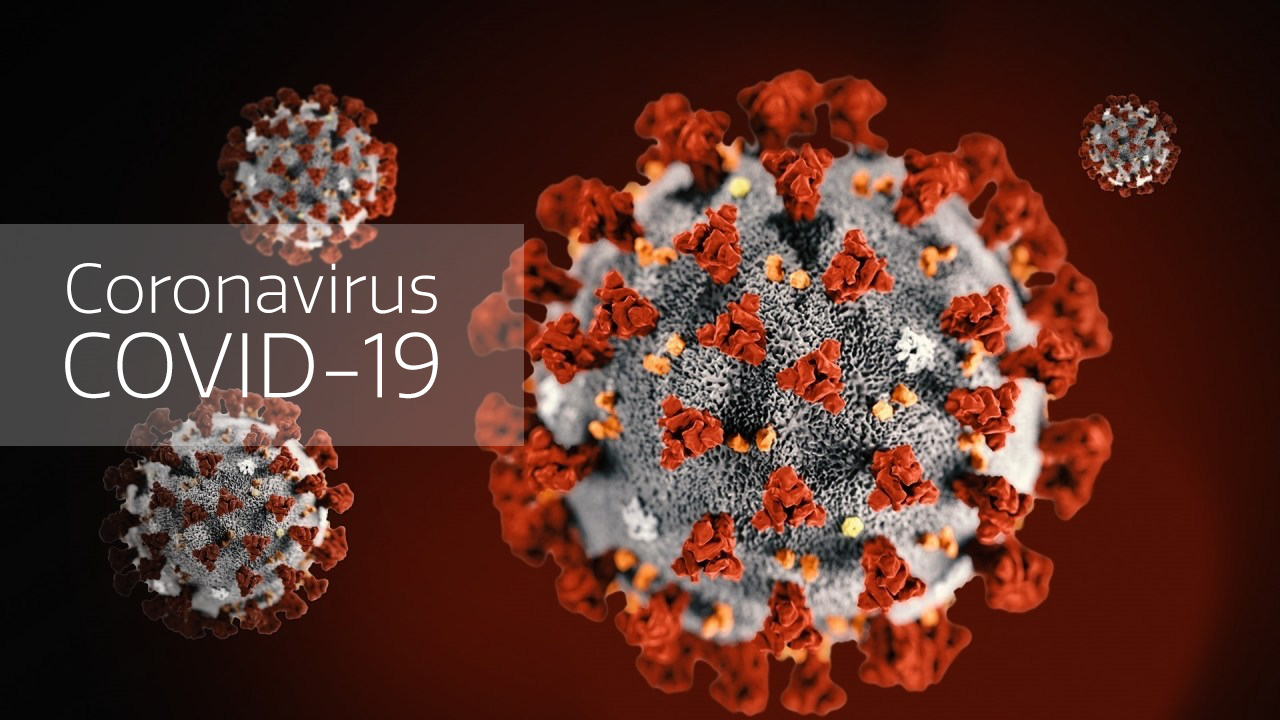

In [2]:
from IPython.display import Image
Image("https://nationalastro.org/wp-content/uploads/2020/03/Covid-19.jpg")

## About

### COVID-19 (Corona Virus Disease 2019)
- Caused by a SARS-COV-2 corona virus.
- First identified in Wuhan, Hubei, China. The earliest reported symptoms was detected in November 2019.
- On 30 January the WHO declared the outbreak to be a Public Health Emergency of International Concern
- Until today, nearly 1 million people around the world are confirmed to be positive with Covid-19 by [Worldometer live tracking](https://www.worldometers.info/coronavirus/)


### Data:

**- [Novel Coronavirus (COVID-19) Cases, provided by JHU CSSE](https://github.com/CSSEGISandData/COVID-19)
**
- [COVID19 Global Forecasting ](https://www.kaggle.com/c/covid19-global-forecasting-week-2/data)

- [COVID-19 Complete Dataset](https://www.kaggle.com/imdevskp/corona-virus-report)

- [COVID19 Demographic Data](https://www.kaggle.com/koryto/countryinfo#covid19countryinfo.csv)

- [World Population Data](https://www.kaggle.com/anjum48/covid19-population-data)

- [Weather Data](https://www.kaggle.com/noaa/gsod)

- [Additiional Weather Data](https://www.kaggle.com/winterpierre91/covid19-global-weather-data#temperature_dataframe.csv)
                             

#### This document inspired by Multiple Team's work Kaggle, I have used the content from these projects. 
##### https://www.kaggle.com/moon9439/seir-model-of-covid19-and-analysis/notebook
##### https://www.kaggle.com/imdevskp/covid-19-analysis-visualization-comparisons



In [3]:
## Install libraries in Notebook
# install calmap
# ==============

# ! pip install calmap
# ! pip install folium
# ! pip install plotly

# ! pip install us

     |████████████████████████████████| 11.5 MB 1.6 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=069ce49d2023e95e501efe691e2bef1735d74158d51e7ad64a1079ab822d86a6
  Stored in directory: /Users/ajithkumar/Library/Caches/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [4]:
### Use Libraries

# Import
# ======

# essential libraries
import math
import random
from datetime import timedelta
from urllib.request import urlopen
import json

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
#import calmap
import folium

# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# to USA states details
#import us

import glob
import os

In [5]:
# for offline ploting
# ===================
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

# Dataset

In [6]:
# list files
# ==========
# Mac / Linux
!ls ../datasets/corona-virus-report

australia_state_wise.csv malaysia_state_wise.csv  usa_state_wise.csv
china_province_wise.csv  singapore_state_wise.csv


In [ ]:
#Windows
#!dir ..\datasets\corona-virus-report

In [9]:
# Merge files
# ==========

path = r'../datasets/corona-virus-report' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))



In [10]:
selectedCountires = pd.concat((pd.read_csv(f,parse_dates=['Date']) for f in all_files)) 
selectedCountires.to_csv('selected_countries.csv', index=False)


In [11]:
selectedCountires.sample(6)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
592,Australian Capital Territory,Australia,-35.4735,149.0124,2020-04-05,96,2,28
600,Australian Capital Territory,Australia,-35.4735,149.0124,2020-04-06,96,2,40
143,Western Australia,Australia,-31.9505,115.8605,2020-02-08,0,0,0
80,Australian Capital Territory,Australia,-35.4735,149.0124,2020-02-01,0,0,0
394,Yunnan,China,24.9740,101.4870,2020-02-02,105,0,3
1928,Hunan,China,27.6104,111.7088,2020-03-20,1018,4,1014


In [12]:
### Load Data

#### Train dataset from Multiple Sources

## 1) Exploratory Data Analysis

<a id='eda'></a>

#### In this section, I will present some interactive visualizations for us to understand the big picture of our current situation in COVID-19 pandemic. 


### Number of cases around the world

<a id='world'></a>

In [125]:
# importing datasets
# ==================

full_table = pd.read_csv('../datasets/covid_19_clean_complete.csv', 
                         parse_dates=['Date'])
full_table.sample(6)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
12590,NaN,Philippines,13.0000,122.0000,2020-03-09,20,1,1
6737,NaN,Italy,43.0000,12.0000,2020-02-16,3,0,0
12,South Australia,Australia,-34.9285,138.6007,2020-01-22,0,0,0
18396,NaN,Paraguay,-23.4425,-58.4438,2020-03-31,65,3,1
26651,NaN,MS Zaandam,0.0000,0.0000,2020-05-01,9,2,0
18893,NaN,Liechtenstein,47.1400,9.5500,2020-04-02,75,0,0


In [17]:
### Overwrite full table with selected countries
full_table = selectedCountires 
full_table.sample(6)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
37,Tasmania,Australia,-41.4545,145.9707,2020-01-26,0,0,0,0
1179,Shandong,China,36.3427,118.1498,2020-02-26,756,6,377,373
82,Jiangsu,China,32.9711,119.4550,2020-01-24,9,0,0,9
3486,Ningxia,China,37.2692,106.1655,2020-05-06,75,0,75,0
1508,Shaanxi,China,35.1917,108.8701,2020-03-07,245,1,226,18
792,Anhui,China,31.8257,117.2264,2020-02-15,950,6,221,723


In [14]:
# dataframe info
full_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 0 to 106
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  4387 non-null   object        
 1   Country/Region  4601 non-null   object        
 2   Lat             4601 non-null   float64       
 3   Long            4601 non-null   float64       
 4   Date            4601 non-null   datetime64[ns]
 5   Confirmed       4601 non-null   object        
 6   Deaths          4601 non-null   object        
 7   Recovered       4601 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 323.5+ KB


In [18]:
# checking for missing value
full_table.isna().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
dtype: int64

In [19]:
# Cleaning data
# =============

# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

# replacing Mainland china with just China
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

# filling missing values 
full_table[['Province/State']] = full_table[['Province/State']].fillna('')
full_table[['Confirmed', 'Deaths', 'Recovered', 'Active']] = full_table[['Confirmed', 'Deaths', 'Recovered', 'Active']].fillna(0)

# fixing datatypes
full_table['Recovered'] = full_table['Recovered'].astype(int)

full_table.sample(6)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
1938,Shandong,China,36.3427,118.1498,2020-03-20,762,7,748,7
2225,Hunan,China,27.6104,111.7088,2020-03-29,1018,4,1014,0
1429,Heilongjiang,China,47.8620,127.7615,2020-03-05,481,13,379,89
75,Queensland,Australia,-28.0167,153.4000,2020-01-31,2,0,0,2
2791,Liaoning,China,41.2956,122.6085,2020-04-15,145,2,138,5
87,,Singapore,1.2833,103.8333,2020-04-18,5992,11,740,5241


In [21]:
# Grouped by day, country
# =======================

full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

# new cases ======================================================
temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()

mask = temp['Country/Region'] != temp['Country/Region'].shift(1)

temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan

# renaming columns
temp.columns = ['Country/Region', 'Date', 'New cases', 'New deaths', 'New recovered']
# =================================================================

# merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Country/Region', 'Date'])

# filling na with 0
full_grouped = full_grouped.fillna(0)

# fixing data types
cols = ['New cases', 'New deaths', 'New recovered']
full_grouped[cols] = full_grouped[cols].astype('int')

full_grouped['New cases'] = full_grouped['New cases'].apply(lambda x: 0 if x<0 else x)

full_grouped.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Australia,0,0,0,0,0,0,0
1,2020-01-22,China,548,17,28,503,0,0,0
2,2020-01-22,Malaysia,0,0,0,0,0,0,0
3,2020-01-22,Singapore,0,0,0,0,0,0,0
4,2020-01-23,Australia,0,0,0,0,0,0,0


In [24]:
# Day wise
# ========

# table
day_wise = full_grouped.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases'].sum().reset_index()

# number cases per 100 cases
day_wise['Deaths / 100 Cases'] = round((day_wise['Deaths']/day_wise['Confirmed'])*100, 2)
day_wise['Recovered / 100 Cases'] = round((day_wise['Recovered']/day_wise['Confirmed'])*100, 2)
day_wise['Deaths / 100 Recovered'] = round((day_wise['Deaths']/day_wise['Recovered'])*100, 2)

# no. of countries
day_wise['No. of countries'] = full_grouped[full_grouped['Confirmed']!=0].groupby('Date')['Country/Region'].unique().apply(len).values

# fillna by 0
cols = ['Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered']
day_wise[cols] = day_wise[cols].fillna(0)

day_wise.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,548,17,28,503,0,3.10,5.11,60.71,1
1,2020-01-23,644,18,30,596,96,2.80,4.66,60.00,2
2,2020-01-24,923,26,36,861,279,2.82,3.90,72.22,2
3,2020-01-25,1412,42,39,1331,489,2.97,2.76,107.69,3
4,2020-01-26,2087,56,49,1982,675,2.68,2.35,114.29,4


In [27]:
# Country wise
# ============

# getting latest values
country_wise = full_grouped[full_grouped['Date']==max(full_grouped['Date'])].reset_index(drop=True).drop('Date', axis=1)

# group by country
country_wise = country_wise.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases'].sum().reset_index()

# per 100 cases
country_wise['Deaths / 100 Cases'] = round((country_wise['Deaths']/country_wise['Confirmed'])*100, 2)
country_wise['Recovered / 100 Cases'] = round((country_wise['Recovered']/country_wise['Confirmed'])*100, 2)
country_wise['Deaths / 100 Recovered'] = round((country_wise['Deaths']/country_wise['Recovered'])*100, 2)

cols = ['Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered']
country_wise[cols] = country_wise[cols].fillna(0)

country_wise.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered
0,Australia,6913,97,6078,738,19,1.40,87.92,1.60
1,China,83975,4637,78977,361,5,5.52,94.05,5.87
2,Malaysia,6467,107,4776,1584,39,1.65,73.85,2.24
3,Singapore,20939,20,1712,19207,741,0.10,8.18,1.17


In [29]:
# load population dataset
pop = pd.read_csv("../datasets/population_by_country_2020.csv")

# select only population
pop = pop.iloc[:, :2]

# rename column names
pop.columns = ['Country/Region', 'Population']

# merged data
country_wise = pd.merge(country_wise, pop, on='Country/Region', how='left')

# update population
cols = ['Burma', 'Congo (Brazzaville)', 'Congo (Kinshasa)', "Cote d'Ivoire", 'Czechia', 
        'Kosovo', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 
        'Taiwan*', 'US', 'West Bank and Gaza', 'Sao Tome and Principe']
pops = [54409800, 89561403, 5518087, 26378274, 10708981, 1793000, 
        53109, 110854, 23806638, 330541757, 4543126, 219159]
for c, p in zip(cols, pops):
    country_wise.loc[country_wise['Country/Region']== c, 'Population'] = p
    
# missing values
country_wise.isna().sum()
country_wise[country_wise['Population'].isna()]['Country/Region'].tolist()

# Cases per population
country_wise['Cases / Million People'] = round((country_wise['Confirmed'] / country_wise['Population']) * 1000000)

country_wise.head()


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Population_x,Cases / Million People,Population_y,Population
0,Australia,6913,97,6078,738,19,1.40,87.92,1.60,25439164,NaN,25439164,NaN
1,China,83975,4637,78977,361,5,5.52,94.05,5.87,1438207241,NaN,1438207241,NaN
2,Malaysia,6467,107,4776,1584,39,1.65,73.85,2.24,32280610,NaN,32280610,NaN
3,Singapore,20939,20,1712,19207,741,0.10,8.18,1.17,5840996,NaN,5840996,NaN


In [30]:
list_of_values = ['Singapore','Malaysia','Australia','China']
sel_country = country_wise[country_wise['Country/Region'].isin(list_of_values)]
sel_country.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Population_x,Cases / Million People,Population_y,Population
0,Australia,6913,97,6078,738,19,1.40,87.92,1.60,25439164,NaN,25439164,NaN
1,China,83975,4637,78977,361,5,5.52,94.05,5.87,1438207241,NaN,1438207241,NaN
2,Malaysia,6467,107,4776,1584,39,1.65,73.85,2.24,32280610,NaN,32280610,NaN
3,Singapore,20939,20,1712,19207,741,0.10,8.18,1.17,5840996,NaN,5840996,NaN


In [135]:
country_wise = sel_country

In [136]:
full_grouped.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Australia,0,0,0,0,0,0,0
1,2020-01-22,China,548,17,28,503,0,0,0
2,2020-01-22,Malaysia,0,0,0,0,0,0,0
3,2020-01-22,Singapore,0,0,0,0,0,0,0
4,2020-01-23,Australia,0,0,0,0,0,0,0


In [31]:
today = full_grouped[full_grouped['Date']==max(full_grouped['Date'])].reset_index(drop=True).drop('Date', axis=1)[['Country/Region', 'Confirmed']]
last_week = full_grouped[full_grouped['Date']==max(full_grouped['Date'])-timedelta(days=7)].reset_index(drop=True).drop('Date', axis=1)[['Country/Region', 'Confirmed']]

temp = pd.merge(today, last_week, on='Country/Region', suffixes=(' today', ' last week'))

# temp = temp[['Country/Region', 'Confirmed last week']]
temp['1 week change'] = temp['Confirmed today'] - temp['Confirmed last week']

temp = temp[['Country/Region', 'Confirmed last week', '1 week change']]

country_wise = pd.merge(country_wise, temp, on='Country/Region')

country_wise['1 week % increase'] = round(country_wise['1 week change']/country_wise['Confirmed last week']*100, 2)

country_wise.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Population_x,Cases / Million People,Population_y,Population,Confirmed last week,1 week change,1 week % increase
0,Australia,6913,97,6078,738,19,1.40,87.92,1.60,25439164,NaN,25439164,NaN,6766,147,2.17
1,China,83975,4637,78977,361,5,5.52,94.05,5.87,1438207241,NaN,1438207241,NaN,83956,19,0.02
2,Malaysia,6467,107,4776,1584,39,1.65,73.85,2.24,32280610,NaN,32280610,NaN,6002,465,7.75
3,Singapore,20939,20,1712,19207,741,0.10,8.18,1.17,5840996,NaN,5840996,NaN,16169,4770,29.50


In [32]:
country_wise[country_wise['Cases / Million People'].isna()]

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Population_x,Cases / Million People,Population_y,Population,Confirmed last week,1 week change,1 week % increase
0,Australia,6913,97,6078,738,19,1.40,87.92,1.60,25439164,NaN,25439164,NaN,6766,147,2.17
1,China,83975,4637,78977,361,5,5.52,94.05,5.87,1438207241,NaN,1438207241,NaN,83956,19,0.02
2,Malaysia,6467,107,4776,1584,39,1.65,73.85,2.24,32280610,NaN,32280610,NaN,6002,465,7.75
3,Singapore,20939,20,1712,19207,741,0.10,8.18,1.17,5840996,NaN,5840996,NaN,16169,4770,29.50


In [34]:
temp = full_table.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp = temp[temp['Date']==max(temp['Date'])].reset_index(drop=True)

tm = temp.melt(id_vars="Date", value_vars=['Active', 'Deaths', 'Recovered'])
fig = px.treemap(tm, path=["variable"], values="value", height=225, width=1200,
                 color_discrete_sequence=[act, rec, dth])
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [40]:
temp = full_table.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Active'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case', height=600,
             title='Cases over time', color_discrete_sequence = [rec, dth, act])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [41]:
# World wide

temp = full_table[full_table['Date'] == max(full_table['Date'])]

m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=1)

for i in range(0, len(temp)):
    folium.Circle(
        location=[temp.iloc[i]['Lat'], temp.iloc[i]['Long']],
        color='crimson', fill='crimson',
        tooltip =   '<li><bold>Country : '+str(temp.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(temp.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(temp.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(temp.iloc[i]['Deaths']),
        radius=int(temp.iloc[i]['Confirmed'])**0.5).add_to(m)
m

In [42]:
# Over the time

fig = px.choropleth(full_grouped, locations="Country/Region", locationmode='country names', color=np.log(full_grouped["Confirmed"]), 
                    hover_name="Country/Region", animation_frame=full_grouped["Date"].dt.strftime('%Y-%m-%d'),
                    title='Cases over time', color_continuous_scale=px.colors.sequential.Inferno)
fig.update(layout_coloraxis_showscale=False)
fig.show()

TypeError: 'ValidatorCompat' object does not support item assignment

In [39]:
# Confirmed
fig_c = px.choropleth(country_wise, locations="Country/Region", locationmode='country names', 
                      color=np.log(country_wise["Confirmed"]), hover_name="Country/Region", hover_data=['Confirmed'])

# Deaths
temp = country_wise[country_wise['Deaths']>0]
fig_d = px.choropleth(temp, locations="Country/Region", locationmode='country names',
                      color=np.log(temp["Deaths"]), hover_name="Country/Region", hover_data=['Deaths'])

# Plot
fig = make_subplots(rows=1, cols=2, subplot_titles = ['Confirmed', 'Deaths'],
                    specs=[[{"type": "choropleth"}, {"type": "choropleth"}]])

fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_d['data'][0], row=1, col=2)

fig.update(layout_coloraxis_showscale=False)

fig.show()

TypeError: 'ValidatorCompat' object does not support item assignment

# Cases over the time

In [144]:
fig_c = px.bar(day_wise, x="Date", y="Confirmed", color_discrete_sequence = [act])
fig_d = px.bar(day_wise, x="Date", y="Deaths", color_discrete_sequence = [dth])

fig = make_subplots(rows=1, cols=2, shared_xaxes=False, horizontal_spacing=0.1,
                    subplot_titles=('Confirmed cases', 'Deaths reported'))

fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_d['data'][0], row=1, col=2)

fig.update_layout(height=480)
fig.show()

# ===============================

fig_1 = px.line(day_wise, x="Date", y="Deaths / 100 Cases", color_discrete_sequence = [dth])
fig_2 = px.line(day_wise, x="Date", y="Recovered / 100 Cases", color_discrete_sequence = [rec])
fig_3 = px.line(day_wise, x="Date", y="Deaths / 100 Recovered", color_discrete_sequence = ['#333333'])

fig = make_subplots(rows=1, cols=3, shared_xaxes=False, 
                    subplot_titles=('Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered'))

fig.add_trace(fig_1['data'][0], row=1, col=1)
fig.add_trace(fig_2['data'][0], row=1, col=2)
fig.add_trace(fig_3['data'][0], row=1, col=3)

fig.update_layout(height=480)
fig.show()

# ===================================

fig_c = px.bar(day_wise, x="Date", y="New cases", color_discrete_sequence = [act])
fig_d = px.bar(day_wise, x="Date", y="No. of countries", color_discrete_sequence = [dth])

fig = make_subplots(rows=1, cols=2, shared_xaxes=False, horizontal_spacing=0.1,
                    subplot_titles=('No. of new cases everyday', 'No. of countries'))

fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_d['data'][0], row=1, col=2)

fig.update_layout(height=480)
fig.show()

# Top Countries

In [149]:
# confirmed - deaths
fig_c = px.bar(country_wise.sort_values('Confirmed').tail(15), x="Confirmed", y="Country/Region", 
               text='Confirmed', orientation='h', color_discrete_sequence = [act])
fig_d = px.bar(country_wise.sort_values('Deaths').tail(15), x="Deaths", y="Country/Region", 
               text='Deaths', orientation='h', color_discrete_sequence = [dth])

# recovered - active
fig_r = px.bar(country_wise.sort_values('Recovered').tail(15), x="Recovered", y="Country/Region", 
               text='Recovered', orientation='h', color_discrete_sequence = [rec])
fig_a = px.bar(country_wise.sort_values('Active').tail(15), x="Active", y="Country/Region", 
               text='Active', orientation='h', color_discrete_sequence = ['#333333'])

# death - recoverd / 100 cases
fig_dc = px.bar(country_wise.sort_values('Deaths / 100 Cases').tail(15), x="Deaths / 100 Cases", y="Country/Region", 
               text='Deaths / 100 Cases', orientation='h', color_discrete_sequence = ['#f38181'])
fig_rc = px.bar(country_wise.sort_values('Recovered / 100 Cases').tail(15), x="Recovered / 100 Cases", y="Country/Region", 
               text='Recovered / 100 Cases', orientation='h', color_discrete_sequence = ['#a3de83'])

# new cases - cases per million people
fig_nc = px.bar(country_wise.sort_values('New cases').tail(15), x="New cases", y="Country/Region", 
               text='New cases', orientation='h', color_discrete_sequence = ['#c61951'])
temp = country_wise[country_wise['Population']>1000000]
fig_p = px.bar(temp.sort_values('Cases / Million People').tail(15), x="Cases / Million People", y="Country/Region", 
               text='Cases / Million People', orientation='h', color_discrete_sequence = ['#741938'])

# week change, percent increase
fig_wc = px.bar(country_wise.sort_values('1 week change').tail(15), x="1 week change", y="Country/Region", 
               text='1 week change', orientation='h', color_discrete_sequence = ['#004a7c'])
temp = country_wise[country_wise['Confirmed']>100]
fig_pi = px.bar(temp.sort_values('1 week % increase').tail(15), x="1 week % increase", y="Country/Region", 
               text='1 week % increase', orientation='h', color_discrete_sequence = ['#005691'], 
                hover_data=['Confirmed last week', 'Confirmed'])


# plot
fig = make_subplots(rows=5, cols=2, shared_xaxes=False, horizontal_spacing=0.14, vertical_spacing=0.08,
                    subplot_titles=('Confirmed cases', 'Deaths reported', 'Recovered', 'Active cases', 
                                    'Deaths / 100 cases', 'Recovered / 100 cases', 'New cases', 
                                    'Cases / Million People', '1 week increase', '1 week % increase'))

fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_d['data'][0], row=1, col=2)
fig.add_trace(fig_r['data'][0], row=2, col=1)
fig.add_trace(fig_a['data'][0], row=2, col=2)

fig.add_trace(fig_dc['data'][0], row=3, col=1)
fig.add_trace(fig_rc['data'][0], row=3, col=2)
fig.add_trace(fig_nc['data'][0], row=4, col=1)
fig.add_trace(fig_p['data'][0], row=4, col=2)

fig.add_trace(fig_wc['data'][0], row=5, col=1)
fig.add_trace(fig_pi['data'][0], row=5, col=2)


fig.update_layout(height=3000)

In [153]:
temp = full_table.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths']
temp = temp.sum().diff().reset_index()

mask = temp['Country/Region'] != temp['Country/Region'].shift(1)

temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan

#temp = temp[temp['Country/Region'].isin(gt_10000)]

#countries = ['China', 'Malaysia', 'Singapore', 'Australia']
countries = temp['Country/Region'].unique()

n_cols = 4
n_rows = math.ceil(len(countries)/n_cols)

fig = make_subplots(rows=n_rows, cols=n_cols, shared_xaxes=False, subplot_titles=countries)

for ind, country in enumerate(countries):
    row = int((ind/n_cols)+1)
    col = int((ind%n_cols)+1)
    fig.add_trace(go.Bar(x=temp['Date'], y=temp.loc[temp['Country/Region']==country, 'Confirmed'], name=country), row=row, col=col)
    
fig.update_layout(height=1000, title_text="No. of new cases in each Country")
fig.update_layout(showlegend=False)
fig.show()